In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_2016 = pd.read_csv('/Users/linneajensen/Dropbox/ITU/Thesis/Data/eurovision_points_2016_2022.csv')
df_raw = pd.read_csv('/Users/linneajensen/Dropbox/ITU/Thesis/Data/eurovision_lang_count.csv')


In [2]:
df_raw

,year,Artist,from_country,to_country,points,total_points,rank,from_code2,from_code3,to_code2,...,gender,migration_v2p,population_p,prop_emigrants_v2p,migration_p2v,population_v,prop_emigrants_p2v,migration_pop_year,comps_without_win,has_border
0,1998,Danijela,belgium,croatia,5,131,5.0,BE,BEL,HR,...,female,205.0,4620030.0,0.000044,72.0,10136811.0,0.000007,1995.0,42,False
1,1998,Michael Hajiyanni,belgium,cyprus,2,37,11.0,BE,BEL,CY,...,male,92.0,862418.0,0.000107,77.0,10136811.0,0.000008,1995.0,42,False
2,1998,Koit Toome,belgium,estonia,0,36,12.0,BE,BEL,EE,...,male,0.0,1436634.0,0.000000,57.0,10136811.0,0.000006,1995.0,42,False
3,1998,Vlado Janevski,belgium,north macedonia,0,16,19.0,BE,BEL,MK,...,male,NaN,NaN,NaN,120.0,10136811.0,0.000012,1995.0,42,False
4,1998,Edea,belgium,finland,0,22,15.0,BE,BEL,FI,...,group,144.0,5107790.0,0.000028,1541.0,10136811.0,0.000152,1995.0,42,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21305,2022,Konstrakta,united kingdom,serbia,0,169,5.0,GB,GBR,RS,...,female,658.0,6899126.0,0.000095,9343.0,67081000.0,0.000139,2020.0,13,False
21306,2022,Chanel,united kingdom,spain,8,282,3.0,GB,GBR,ES,...,female,303193.0,47365655.0,0.006401,150892.0,67081000.0,0.002249,2020.0,51,False
21307,2022,Cornelia Jakobs,united kingdom,sweden,10,245,4.0,GB,GBR,SE,...,female,29715.0,10353442.0,0.002870,35824.0,67081000.0,0.000534,2020.0,5,False
21308,2022,Marius Bear,united kingdom,switzerland,0,28,18.0,GB,GBR,CH,...,male,45951.0,8638167.0,0.005320,23649.0,67081000.0,0.000353,2020.0,32,False


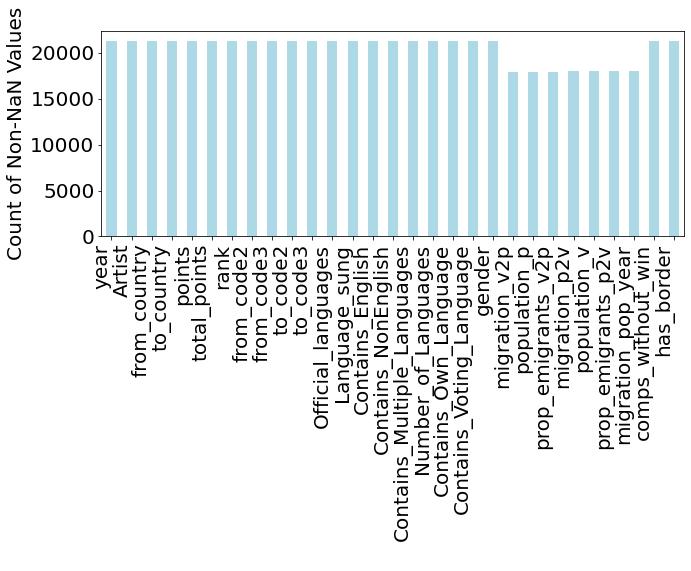

In [21]:
# Count non-NaN values for each column
non_nan_counts = df_raw.count()

# Create a bar plot
plt.figure(figsize=(10, 8))
non_nan_counts.plot(kind='bar', color='lightblue')
plt.title('')
plt.xlabel(' ')
plt.ylabel('Count of Non-NaN Values')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.savefig('plots/plot_dataDistribution.pdf')
plt.show()


In [109]:
#renaming country names in raw
df_raw['from_country'].replace({'russian federation': 'russia', 
                                'czech republic': 'czechia',
                                'moldova, republic of':'moldova',
                                'macedonia':'north macedonia'}, inplace=True)
df_raw['to_country'].replace({'russian federation': 'russia', 
                                'czech republic': 'czechia',
                                'moldova, republic of':'moldova',
                                'macedonia':'north macedonia'}, inplace=True)


In [110]:
#renaming country names in df_2016
df_2016['from_country'].replace({'russian federation': 'russia', 
                                'czech republic': 'czechia',
                                'moldova, republic of':'moldova',
                                'macedonia':'north macedonia'}, inplace=True)
df_2016['to_country'].replace({'russian federation': 'russia', 
                                'czech republic': 'czechia',
                                'moldova, republic of':'moldova',
                                'macedonia':'north macedonia'}, inplace=True)


In [111]:
#merge the two dataframes, left join on biggest df
merged_df = pd.merge(df_raw, df_2016, on=['year','from_country','to_country'], how='left')
merged_df

,year,Artist,from_country,to_country,points_x,total_points,rank,from_code2,from_code3,to_code2,to_code3,Official_languages,Language_sung,Contains_English,Contains_NonEnglish,Contains_Multiple_Languages,Number_of_Languages,Contains_Own_Language,Contains_Voting_Language,gender,migration_v2p,population_p,prop_emigrants_v2p,migration_p2v,population_v,prop_emigrants_p2v,migration_pop_year,comps_without_win,has_border,Unnamed: 0,index,televote_points,jury_points,points_y
0,1998,Danijela,belgium,croatia,5,131,5.0,BE,BEL,HR,HRV,croatian,['croatian'],False,True,False,1,True,False,female,205.0,4620030.0,0.000044,72.0,10136811.0,0.000007,1995.0,42,False,NaN,NaN,NaN,NaN,NaN
1,1998,Michael Hajiyanni,belgium,cyprus,2,37,11.0,BE,BEL,CY,CYP,greek turkish,['greek'],False,True,False,1,True,False,male,92.0,862418.0,0.000107,77.0,10136811.0,0.000008,1995.0,42,False,NaN,NaN,NaN,NaN,NaN
2,1998,Koit Toome,belgium,estonia,0,36,12.0,BE,BEL,EE,EST,võro estonian,['estonian'],False,True,False,1,True,False,male,0.0,1436634.0,0.000000,57.0,10136811.0,0.000006,1995.0,42,False,NaN,NaN,NaN,NaN,NaN
3,1998,Vlado Janevski,belgium,north macedonia,0,16,19.0,BE,BEL,MK,MKD,macedonian albanian,['macedonian'],False,True,False,1,True,False,male,NaN,NaN,NaN,120.0,10136811.0,0.000012,1995.0,42,False,NaN,NaN,NaN,NaN,NaN
4,1998,Edea,belgium,finland,0,22,15.0,BE,BEL,FI,FIN,finnish swedish,['finnish'],False,True,False,1,True,False,group,144.0,5107790.0,0.000028,1541.0,10136811.0,0.000152,1995.0,42,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21305,2022,Konstrakta,united kingdom,serbia,0,169,5.0,GB,GBR,RS,SRB,serbian,['serbian'],False,True,False,1,True,False,female,658.0,6899126.0,0.000095,9343.0,67081000.0,0.000139,2020.0,13,False,6280.0,898.0,1.0,1.0,1.0
21306,2022,Chanel,united kingdom,spain,8,282,3.0,GB,GBR,ES,ESP,spanish,"['spanish', 'english']",True,True,True,2,True,True,female,303193.0,47365655.0,0.006401,150892.0,67081000.0,0.002249,2020.0,51,False,6266.0,884.0,5.0,10.0,7.5
21307,2022,Cornelia Jakobs,united kingdom,sweden,10,245,4.0,GB,GBR,SE,SWE,swedish,['english'],True,False,False,1,False,True,female,29715.0,10353442.0,0.002870,35824.0,67081000.0,0.000534,2020.0,5,False,6276.0,894.0,4.0,12.0,8.0
21308,2022,Marius Bear,united kingdom,switzerland,0,28,18.0,GB,GBR,CH,CHE,french bern fribourg geneva jura neuchâtel val...,['english'],True,False,False,1,False,True,male,45951.0,8638167.0,0.005320,23649.0,67081000.0,0.000353,2020.0,32,False,6261.0,879.0,0.0,2.0,2.0


In [112]:
merged_df.to_csv('/Users/linneajensen/Dropbox/ITU/Thesis/Data/eurovision_correct_points.csv')  


In [113]:
#manually moved televote points, added missing value from 2003 and renamed points_x column to points
df_moved = pd.read_csv('/Users/linneajensen/Dropbox/ITU/Thesis/Data/eurovision_correct_points_moved.csv')
df_moved

,Unnamed: 0,year,Artist,from_country,to_country,points,total_points,rank,from_code2,from_code3,to_code2,to_code3,Official_languages,Language_sung,Contains_English,Contains_NonEnglish,Contains_Multiple_Languages,Number_of_Languages,Contains_Own_Language,Contains_Voting_Language,gender,migration_v2p,population_p,prop_emigrants_v2p,migration_p2v,population_v,prop_emigrants_p2v,migration_pop_year,comps_without_win,has_border,televote_points,jury_points,mean_points
0,0,1998,Danijela,belgium,croatia,5.0,131,5,BE,BEL,HR,HRV,croatian,['croatian'],False,True,False,1,True,False,female,205.0,4620030.0,0.000044,72.0,10136811.0,0.000007,1995.0,42,False,NaN,NaN,NaN
1,1,1998,Michael Hajiyanni,belgium,cyprus,2.0,37,11,BE,BEL,CY,CYP,greek turkish,['greek'],False,True,False,1,True,False,male,92.0,862418.0,0.000107,77.0,10136811.0,0.000008,1995.0,42,False,NaN,NaN,NaN
2,2,1998,Koit Toome,belgium,estonia,0.0,36,12,BE,BEL,EE,EST,võro estonian,['estonian'],False,True,False,1,True,False,male,0.0,1436634.0,0.000000,57.0,10136811.0,0.000006,1995.0,42,False,NaN,NaN,NaN
3,3,1998,Vlado Janevski,belgium,north macedonia,0.0,16,19,BE,BEL,MK,MKD,macedonian albanian,['macedonian'],False,True,False,1,True,False,male,NaN,NaN,NaN,120.0,10136811.0,0.000012,1995.0,42,False,NaN,NaN,NaN
4,4,1998,Edea,belgium,finland,0.0,22,15,BE,BEL,FI,FIN,finnish swedish,['finnish'],False,True,False,1,True,False,group,144.0,5107790.0,0.000028,1541.0,10136811.0,0.000152,1995.0,42,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21306,21306,2022,Chanel,united kingdom,spain,5.0,282,3,GB,GBR,ES,ESP,spanish,"['spanish', 'english']",True,True,True,2,True,True,female,303193.0,47365655.0,0.006401,150892.0,67081000.0,0.002249,2020.0,51,False,5.0,10.0,7.5
21307,21307,2022,Cornelia Jakobs,united kingdom,sweden,4.0,245,4,GB,GBR,SE,SWE,swedish,['english'],True,False,False,1,False,True,female,29715.0,10353442.0,0.002870,35824.0,67081000.0,0.000534,2020.0,5,False,4.0,12.0,8.0
21308,21308,2022,Marius Bear,united kingdom,switzerland,0.0,28,18,GB,GBR,CH,CHE,french bern fribourg geneva jura neuchâtel val...,['english'],True,False,False,1,False,True,male,45951.0,8638167.0,0.005320,23649.0,67081000.0,0.000353,2020.0,32,False,0.0,2.0,2.0
21309,21309,2022,Kalush Orchestra,united kingdom,ukraine,12.0,379,1,GB,GBR,UA,UKR,ukrainian,['ukrainian'],False,True,False,1,True,False,group,NaN,NaN,NaN,22119.0,67081000.0,0.000330,2020.0,4,False,12.0,0.0,12.0


In [114]:
#Remove all rows with 0 points
df_moved['points'] = df_moved['points'].fillna(0)
df_no0 = df_moved[df_moved['points'] != 0]
df_no0

,Unnamed: 0,year,Artist,from_country,to_country,points,total_points,rank,from_code2,from_code3,to_code2,to_code3,Official_languages,Language_sung,Contains_English,Contains_NonEnglish,Contains_Multiple_Languages,Number_of_Languages,Contains_Own_Language,Contains_Voting_Language,gender,migration_v2p,population_p,prop_emigrants_v2p,migration_p2v,population_v,prop_emigrants_p2v,migration_pop_year,comps_without_win,has_border,televote_points,jury_points,mean_points
0,0,1998,Danijela,belgium,croatia,5.0,131,5,BE,BEL,HR,HRV,croatian,['croatian'],False,True,False,1,True,False,female,205.0,4620030.0,0.000044,72.0,10136811.0,0.000007,1995.0,42,False,NaN,NaN,NaN
1,1,1998,Michael Hajiyanni,belgium,cyprus,2.0,37,11,BE,BEL,CY,CYP,greek turkish,['greek'],False,True,False,1,True,False,male,92.0,862418.0,0.000107,77.0,10136811.0,0.000008,1995.0,42,False,NaN,NaN,NaN
6,6,1998,Guildo Horn feat. Die Orthopädischen Strümpfe,belgium,germany,7.0,86,7,BE,BEL,DE,DEU,german,['german'],False,True,False,1,True,True,group,22307.0,81678051.0,0.000273,65226.0,10136811.0,0.006435,1995.0,15,True,NaN,NaN,NaN
10,10,1998,Dana International,belgium,israel,10.0,172,1,BE,BEL,IL,ISR,hebrew,['hebrew'],False,True,False,1,True,False,female,4294.0,5545000.0,0.000774,4018.0,10136811.0,0.000396,1995.0,18,False,NaN,NaN,NaN
11,11,1998,Chiara,belgium,malta,8.0,165,3,BE,BEL,MT,MLT,maltese english,['english'],True,False,False,1,True,False,female,23.0,377419.0,0.000061,258.0,10136811.0,0.000025,1995.0,42,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21305,21305,2022,Konstrakta,united kingdom,serbia,1.0,169,5,GB,GBR,RS,SRB,serbian,['serbian'],False,True,False,1,True,False,female,658.0,6899126.0,0.000095,9343.0,67081000.0,0.000139,2020.0,13,False,1.0,1.0,1.0
21306,21306,2022,Chanel,united kingdom,spain,5.0,282,3,GB,GBR,ES,ESP,spanish,"['spanish', 'english']",True,True,True,2,True,True,female,303193.0,47365655.0,0.006401,150892.0,67081000.0,0.002249,2020.0,51,False,5.0,10.0,7.5
21307,21307,2022,Cornelia Jakobs,united kingdom,sweden,4.0,245,4,GB,GBR,SE,SWE,swedish,['english'],True,False,False,1,False,True,female,29715.0,10353442.0,0.002870,35824.0,67081000.0,0.000534,2020.0,5,False,4.0,12.0,8.0
21309,21309,2022,Kalush Orchestra,united kingdom,ukraine,12.0,379,1,GB,GBR,UA,UKR,ukrainian,['ukrainian'],False,True,False,1,True,False,group,NaN,NaN,NaN,22119.0,67081000.0,0.000330,2020.0,4,False,12.0,0.0,12.0


In [103]:
#set all emigration NaN values to 0, assuming NaN due to number close to 0
df_no0 = df_no0.fillna(0)
df_no0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 0 to 21310
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   8720 non-null   int64  
 1   year                         8720 non-null   int64  
 2   Artist                       8720 non-null   object 
 3   from_country                 8720 non-null   object 
 4   to_country                   8720 non-null   object 
 5   points                       8720 non-null   float64
 6   total_points                 8720 non-null   int64  
 7   rank                         8720 non-null   int64  
 8   from_code2                   8720 non-null   object 
 9   from_code3                   8720 non-null   object 
 10  to_code2                     8720 non-null   object 
 11  to_code3                     8720 non-null   object 
 12  Official_languages           8720 non-null   object 
 13  Language_sung    

In [104]:

#remove irrelevant columns
df_no0 = df_no0.drop(['from_code3', 'to_code3',], axis=1)

df_no0

,Unnamed: 0,year,Artist,from_country,to_country,points,total_points,rank,from_code2,to_code2,Official_languages,Language_sung,Contains_English,Contains_NonEnglish,Contains_Multiple_Languages,Number_of_Languages,Contains_Own_Language,Contains_Voting_Language,gender,migration_v2p,population_p,prop_emigrants_v2p,migration_p2v,population_v,prop_emigrants_p2v,migration_pop_year,comps_without_win,has_border,televote_points,jury_points,mean_points
0,0,1998,Danijela,belgium,croatia,5.0,131,5,BE,HR,croatian,['croatian'],False,True,False,1,True,False,female,205.0,4620030.0,0.000044,72.0,10136811.0,0.000007,1995.0,42,False,0.0,0.0,0.0
1,1,1998,Michael Hajiyanni,belgium,cyprus,2.0,37,11,BE,CY,greek turkish,['greek'],False,True,False,1,True,False,male,92.0,862418.0,0.000107,77.0,10136811.0,0.000008,1995.0,42,False,0.0,0.0,0.0
6,6,1998,Guildo Horn feat. Die Orthopädischen Strümpfe,belgium,germany,7.0,86,7,BE,DE,german,['german'],False,True,False,1,True,True,group,22307.0,81678051.0,0.000273,65226.0,10136811.0,0.006435,1995.0,15,True,0.0,0.0,0.0
10,10,1998,Dana International,belgium,israel,10.0,172,1,BE,IL,hebrew,['hebrew'],False,True,False,1,True,False,female,4294.0,5545000.0,0.000774,4018.0,10136811.0,0.000396,1995.0,18,False,0.0,0.0,0.0
11,11,1998,Chiara,belgium,malta,8.0,165,3,BE,MT,maltese english,['english'],True,False,False,1,True,False,female,23.0,377419.0,0.000061,258.0,10136811.0,0.000025,1995.0,42,False,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21305,21305,2022,Konstrakta,united kingdom,serbia,1.0,169,5,GB,RS,serbian,['serbian'],False,True,False,1,True,False,female,658.0,6899126.0,0.000095,9343.0,67081000.0,0.000139,2020.0,13,False,1.0,1.0,1.0
21306,21306,2022,Chanel,united kingdom,spain,5.0,282,3,GB,ES,spanish,"['spanish', 'english']",True,True,True,2,True,True,female,303193.0,47365655.0,0.006401,150892.0,67081000.0,0.002249,2020.0,51,False,5.0,10.0,7.5
21307,21307,2022,Cornelia Jakobs,united kingdom,sweden,4.0,245,4,GB,SE,swedish,['english'],True,False,False,1,False,True,female,29715.0,10353442.0,0.002870,35824.0,67081000.0,0.000534,2020.0,5,False,4.0,12.0,8.0
21309,21309,2022,Kalush Orchestra,united kingdom,ukraine,12.0,379,1,GB,UA,ukrainian,['ukrainian'],False,True,False,1,True,False,group,0.0,0.0,0.000000,22119.0,67081000.0,0.000330,2020.0,4,False,12.0,0.0,12.0


In [105]:
df_no0.to_csv('/Users/linneajensen/Dropbox/ITU/Thesis/Data/eurovision_master.csv')  





In [13]:
plt.rcParams.update({'font.size': 20}) 
